# Workshop 06

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Social Media Analytics
- Course ID: BDA600NAA.07578.2241
- Professor: Dr. Pantea Koochemeshkian

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import yaml
import pandas as pd

### Part1: Get the API key

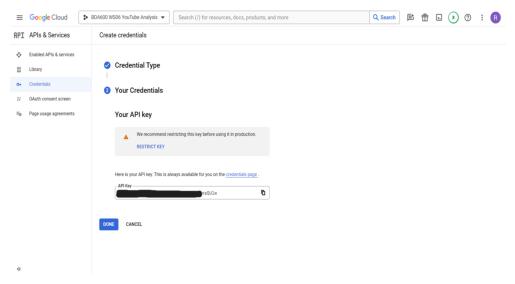

In [2]:
img01_path = 'WS06_Submission/Part01_Screenshot.png'

img01 = Image.open(img01_path)
img01 = img01.resize((1500, 800))
plt.imshow(img01)
plt.axis('off')
plt.show()

### Part02: Retrieve the following information

- Date of publication
- Channel Title
- Title
- Description

In [12]:
# library
import googleapiclient.discovery

In [75]:
# API information
api_service_name = 'youtube'
api_version = 'v3'
with open('auth.yml') as f:
    KEY = yaml.safe_load(f)['YouTube_API']

# client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=KEY
)

# request body
request = youtube.search().list(
    part='id,snippet',
    type='video',
    q='Machine Learning',
    maxResults=10,
    fields='items(id(videoId),snippet(publishTime,channelTitle,title,description))'
)
# get result
response = request.execute()

In [77]:
# necessary data for all video
data_info = []

# adding all results
for item in response['items']:
    data_info.append({
        'Publication Date': item['snippet'].get('publishTime', None),
        'Channel Title': item['snippet'].get('channelTitle', None),
        'Title': item['snippet'].get('title', None),
        'Description': item['snippet'].get('description', None),
    })

# create data frame
df_info = pd.DataFrame(data_info)
df_info

,Publication Date,Channel Title,Title,Description
0,2023-04-10T11:00:03Z,IBM Technology,AI vs Machine Learning,Learn more about watsonx: https://ibm.biz/Bdvx...
1,2018-09-19T14:57:02Z,Simplilearn,Machine Learning | What Is Machine Learning? |...,Professional Certificate Course In AI And Mach...
2,2021-07-14T14:07:15Z,IBM Technology,What is Machine Learning?,Learn about watsonx: https://ibm.biz/BdvxRR Wh...
3,2021-09-09T17:31:56Z,Fireship,Machine Learning Explained in 100 Seconds,Machine Learning is the process of teaching a ...
4,2022-09-26T16:00:28Z,freeCodeCamp.org,Machine Learning for Everybody – Full Course,Learn Machine Learning in a way that is access...
5,2020-09-17T13:00:03Z,Programming with Mosh,Python Machine Learning Tutorial (Data Science),Python Machine Learning Tutorial - Learn how t...
6,2017-11-01T21:50:13Z,CrashCourse,Machine Learning &amp; Artificial Intelligence...,So we've talked a lot in this series about how...
7,2017-01-11T08:24:20Z,OxfordSparks,What is Machine Learning?,Machine learning is all around us; on our phon...
8,2024-03-06T00:31:13Z,Astronomía en Español,A new digitized age of SETI – interferometric ...,Fecha: 05/03/2024 - 12:30 Conferenciante: Dr. ...
9,2023-11-26T21:00:20Z,Boris Meinardus,How I’d learn ML in 2024 (if I could start over),Become better at machine learning in 5 min/ we...


### Part03: Retrieve Statistical Information

In [78]:
# get the video ids
video_ids = [result['id']['videoId'] for result in response['items']]

# get video info
stat_response = youtube.videos().list(
        id=','.join(video_ids),
        part='statistics'
    ).execute()


In [79]:
# define statistics data store
data_stat = []

# get video statistics    
for item in stat_response['items']:
    data_stat.append({
        'ID': item['id'],
        'View': item['statistics'].get('viewCount', None),
        'Like': item['statistics'].get('likeCount', None),
        'Dislike': item['statistics'].get('dislikeCount', None),
        'Favorite': item['statistics'].get('favoriteCount', None),
        'Comment': item['statistics'].get('commentCount', None),
    })

   # create data frame
df_stat = pd.DataFrame(data_stat)
df_stat 

,ID,View,Like,Dislike,Favorite,Comment
0,4RixMPF4xis,778009,24571,None,0,585
1,ukzFI9rgwfU,4296403,53916,None,0,2115
2,9gGnTQTYNaE,145634,2765,None,0,45
3,PeMlggyqz0Y,496939,24903,None,0,434
4,i_LwzRVP7bg,3643454,50558,None,0,952
5,7eh4d6sabA0,2606122,59842,None,0,1704
6,z-EtmaFJieY,863650,18975,None,0,429
7,f_uwKZIAeM0,515554,3727,None,0,81
8,HDZ9vSXekkY,30,2,None,0,0
9,gUmagAluXpk,604644,30896,None,0,498


In [80]:
# store the results in JSON file
with open('WS06_Submission/Part02_Result.json', 'w', encoding='utf-8') as f:
    df_info.to_json(f, force_ascii=False, orient='records', indent=4)

with open('WS06_Submission/Part03_Result.json', 'w', encoding='utf-8') as f:
    df_stat.to_json(f, force_ascii=False, orient='records', indent=4)